# Flugbahn mit Luftwiderstand

Laden der Bibliotheken für die Simulation der Flugbahnen. Die Berechnung der Dynamik ist im Modul [Modul Physik](./physik.py) gespeichert.

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from physik import *

%matplotlib inline

In [2]:
m = 1.
k = 1.
g = 9.81

v0 = np.zeros(4)
# The initial speed vector is oriented to the top right
# v = [x,y,v_x,v_y]
v0[2] = 5.
v0[3] = 10.

## Arten von Luftwiderstand

### Newton (turbulente Strömung, hohe Geschwindigkeit)

$$ F_R = -k \cdot \dot{x}^2 $$

### Stokes (laminare Strömung, niedrige Geschwindigkeiten)

$$ F_R = -k \cdot \dot{x} $$

## Einstellen der Simulation
In wie vielen Zeitschritten soll die Simulation durchgeführt werden und welche Werte für k sollen gesetzt werden:

In [3]:
# aufteilung in 60 Zeit-Schritte von 0 - 3 Sekunden
t = np.linspace(0., 3., 120)

k_werte = [0,0.02,0.04,0.08]

## Zeichnen der Flugbahn
Das Zeichnen der Flugbahn geschieht in drei Schritten. 
1. Erzeugen der Zeichenfläche
2. Berechnen der Punkte und übertragen auf die Zeichenfläche
3. Zeichnung formatieren (Achsen, Legenden,...)


(0, 6)

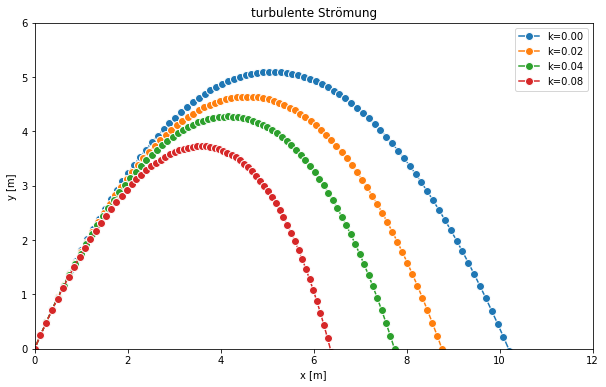

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

for k in k_werte:
    # Simulation mit dem Startwert v0 über das Zeitintervall t
    # turbulente Strömung
    v = spi.odeint(f, v0, t, args=(k,"newton"))
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8,mec='w', label=f'k={k:.2f}')
    
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("turbulente Strömung")
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

(0, 6)

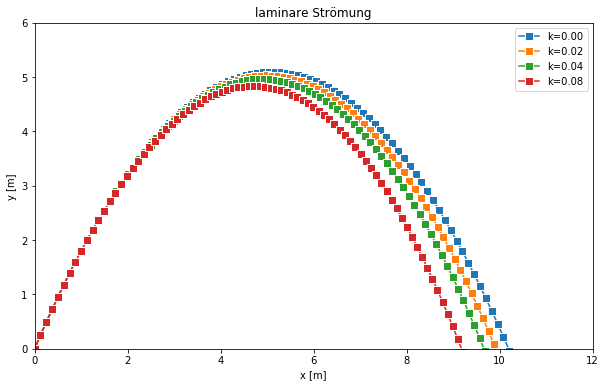

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# We simulate the system for different values of k.
for k in k_werte:
    # Simulation mit dem Startwert v0 über das Zeitintervall t
    # laminare Strömung
    v = spi.odeint(f, v0, t, args=(k,"stokes"))
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 's-', mew=1, ms=8, mec='w', label=f'k={k:.2f}')
    
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("laminare Strömung")
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

In [6]:
k_werte=[0,0.01]

(0, 6)

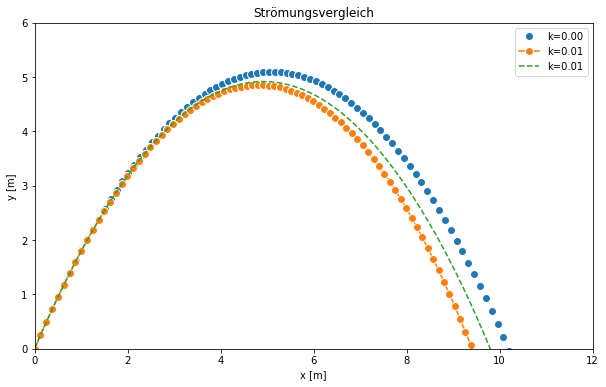

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))


# We simulate the system for different values of k.
for k in k_werte:
    # We simulate the system and evaluate $v$ on the
    # given times.
    if k==0:
        v = spi.odeint(f, v0, t, args=(k,"none"))
        ax.plot(v[:, 0], v[:, 1], 'o', mew=1, ms=8, mec='w', label=f'k={k:.2f}')        
    else:
        v = spi.odeint(f, v0, t, args=(k,"newton"))
        ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8, mec='w', label=f'k={k:.2f}')

        v3 = spi.odeint(f, v0, t, args=(k,"mixed"))
        ax.plot(v3[:, 0], v3[:, 1], '--', mew=1, ms=8, mec='w', label=f'k={k:.2f}')
    
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Strömungsvergleich")
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

In [8]:
for item in v3:
    print(item)

[ 0.  0.  5. 10.]
[0.12597104 0.24867141 4.99370541 9.72815867]
[0.2517836  0.49050655 4.98742666 9.45764747]
[0.37743807 0.7255384  4.98116367 9.18842317]
[0.50293484 0.95379886 4.97491639 8.92044327]
[0.62827432 1.17531876 4.96868476 8.653666  ]
[0.75345689 1.39012791 4.96246872 8.38805021]
[0.87848296 1.59825508 4.95626822 8.12355543]
[1.0033529  1.79972804 4.95008319 7.86014179]
[1.12806711 1.99457354 4.94391359 7.59777004]
[1.25263894 2.18284901 4.94000439 7.34186039]
[1.37716117 2.3647975  4.93875917 7.09272998]
[1.50165201 2.54046618 4.93751426 6.84366237]
[1.62611147 2.70985663 4.93626967 6.59465754]
[1.75053956 2.87297044 4.93502539 6.34571547]
[1.87493628 3.0298092  4.93378142 6.09683616]
[1.99930165 3.18037448 4.93253777 5.84801959]
[2.12363567 3.32466786 4.93129443 5.59926573]
[2.24793834 3.46269092 4.9300514  5.35057457]
[2.37220969 3.59444525 4.92880869 5.1019461 ]
[2.49644971 3.71993243 4.92756629 4.85338031]
[2.62065841 3.83915403 4.9263242  4.60487717]
[2.74483581 3.95